In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newsshare/news_share_data.xlsx


In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



### Dataset Loading

In [107]:
df = pd.read_excel("/kaggle/input/newsshare/news_share_data.xlsx")

### Exploratory Data Analysis (EDA)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

In [109]:
df.describe()

,article_id,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,2014-04-08 18:18:18.305084928,0.526890,11.720837,5.188435,1.215354,4.603757,7.206381,1131.437972,6463.258234,3359.478830,13518.302031,0.446724,0.106187,0.038169,0.017772,0.292537,0.057536,4247.304088
min,2.195051e+06,2014-03-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,2014-04-04 00:00:00,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,2014-04-09 00:00:00,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,2014-04-14 00:00:00,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,2014-04-17 00:00:00,0.867925,162.000000,84.000000,51.000000,7.218430,10.000000,3613.040000,102200.000000,17604.270000,663600.000000,0.875000,0.489623,0.120805,0.103030,1.000000,1.000000,663600.000000
std,4.823885e+05,NaN,0.118793,15.181597,8.495002,4.079730,0.701756,1.856713,1181.134621,7455.421154,1467.674637,51499.106509,0.109167,0.092496,0.015673,0.010557,0.325227,0.266609,22609.634435


In [110]:
df.shape

(1003, 22)

In [111]:
df.isnull().sum()

article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
dtype: int64

In [112]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['title', 'text', 'data_channel'], dtype='object')

Numerical Columns:
Index(['article_id', 'published_date', 'unique_tokens_rate', 'num_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'title_subjectivity', 'title_sentiment_polarity', 'shares'],
      dtype='object')


### Text Preprocessing

In [113]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
import re

# from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [115]:
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

def remove_stopwords(data):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(data)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

#Lemmatize the corpus
def lemma_traincorpus(data):
    ps=PorterStemmer()
    out_data=""
    for words in data:
        out_data+= ps.stem(words)
    return out_data

def tfidf(data):
    tfidfv = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_tfidf


df['text']=df['text'].apply(lambda z: remove_punctuations(z))
df['text']=df['text'].apply(lambda z: remove_html(z))
df['text']=df['text'].apply(lambda z: remove_url(z))
df['text']=df['text'].apply(lambda z: remove_emoji(z))
df['text']=df['text'].apply(lambda z: lemma_traincorpus(z))
df['text'] = df['text'].apply(lambda z: remove_stopwords(z))

In [116]:
df['text'].loc[1]

'April Fools marks day pranking goes corporate former president along major companies like Netflix Lego American Eagle got foolish action today weve compiled every joke gag scam found online Tuesday caused chuckle two confusing holiday Well keep updating lies unearthed Trust one especially companies likely wont feel 100 safe May nggallery id15731 layoutlist titletop'

In [117]:
df['title']=df['title'].apply(lambda z: remove_punctuations(z))
df['title']=df['title'].apply(lambda z: remove_html(z))
df['title']=df['title'].apply(lambda z: remove_url(z))
df['title']=df['title'].apply(lambda z: remove_emoji(z))
df['title']=df['title'].apply(lambda z: lemma_traincorpus(z))
df['title'] = df['title'].apply(lambda z: remove_stopwords(z))

In [118]:
df['title'].loc[1]

'Ultimate Roundup 2014s Biggest April Fools Day Pranks'

In [119]:
df.head()

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,Time YouTube Competitor,reported last week Yahoo getting online video ...,2014-03-31,0.640816,5,3,1,4.579592,5,...,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600
1,7014327,Ultimate Roundup 2014s Biggest April Fools Day...,April Fools marks day pranking goes corporate ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500
2,7014304,Selfie One Garish Jacket Red Sox White House,2013 World Series champion Boston Red Sox visi...,2014-04-01,0.577236,8,1,0,4.627451,7,...,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400
3,7031995,African Telecom Proposes Diverse Emoticons,Less week Apple pledged make emoticons raciall...,2014-04-01,0.525896,4,1,0,5.083665,9,...,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300
4,6541359,Google Launch Improved Android Camera App Repo...,Android users may soon see series new features...,2014-04-01,0.588889,6,9,0,4.336022,7,...,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000


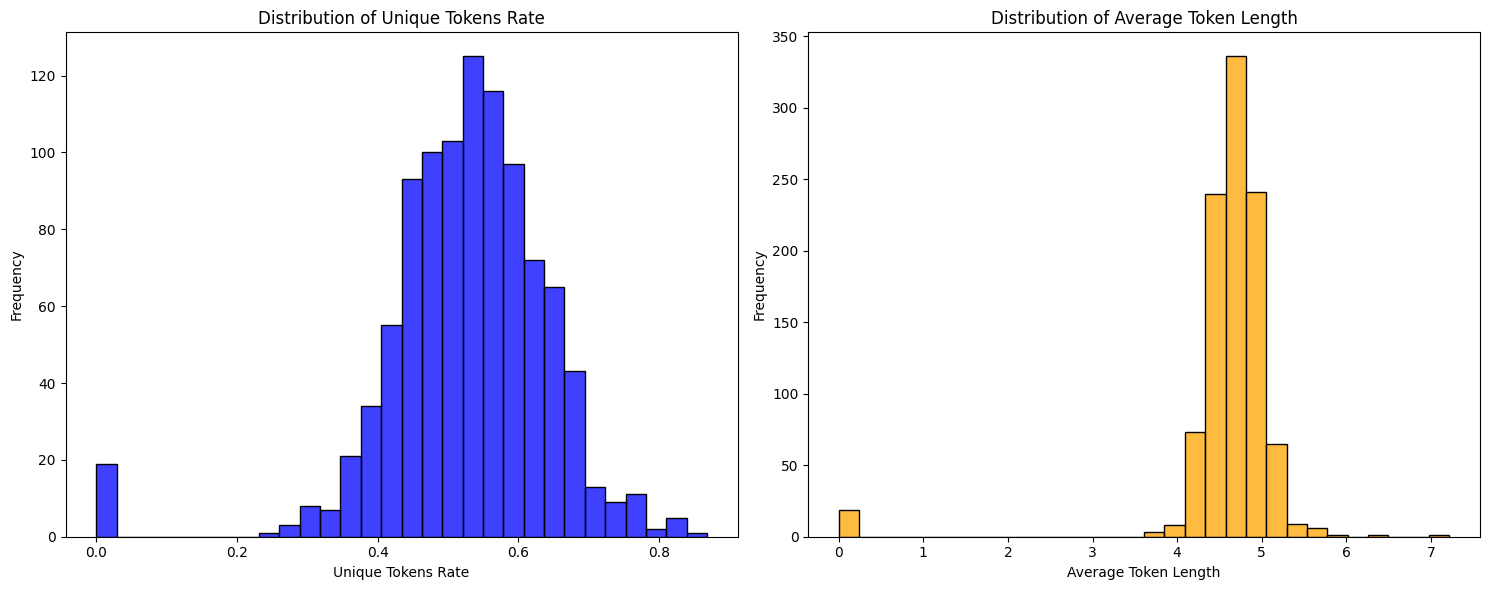

In [120]:
plt.figure(figsize=(15, 6))

# Subplot 1: Distribution of Unique Tokens Rate
plt.subplot(1, 2, 1)
sns.histplot(df['unique_tokens_rate'], bins=30, color='blue')
plt.xlabel('Unique Tokens Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Unique Tokens Rate')

# Subplot 2: Distribution of Average Token Length
plt.subplot(1, 2, 2)
sns.histplot(df['average_token_length'], bins=30, color='orange')
plt.xlabel('Average Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Token Length')

plt.tight_layout()
plt.show()

### Feature Engineering

In [121]:
df['published_date'] = pd.to_datetime(df['published_date'])

# Feature: Weekday
df['weekday'] = df['published_date'].dt.weekday

# Feature: Is Weekend
df['is_weekend'] = df['published_date'].dt.weekday // 5  # 0 for weekdays, 1 for weekends

df['month'] = df['published_date'].dt.month_name()

# Feature: Number of Tokens in title and text Columns
def count_tokens(text):
    words = nltk.word_tokenize(text)
    return len(words)


#after text preprocessing
df['token_count_title'] = df['title'].apply(count_tokens)
df['token_count_text'] = df['text'].apply(count_tokens)

In [122]:
df.head(5)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,weekday,is_weekend,month,token_count_title,token_count_text
0,7014291,Time YouTube Competitor,reported last week Yahoo getting online video ...,2014-03-31,0.640816,5,3,1,4.579592,5,...,0.036735,0.024490,0.25,0.25,1600,0,0,March,3,102
1,7014327,Ultimate Roundup 2014s Biggest April Fools Day...,April Fools marks day pranking goes corporate ...,2014-04-01,0.549618,4,1,0,4.636704,7,...,0.044944,0.003745,0.00,0.00,1500,1,0,April,8,54
2,7014304,Selfie One Garish Jacket Red Sox White House,2013 World Series champion Boston Red Sox visi...,2014-04-01,0.577236,8,1,0,4.627451,7,...,0.035294,0.019608,0.00,0.00,1400,1,0,April,8,244
3,7031995,African Telecom Proposes Diverse Emoticons,Less week Apple pledged make emoticons raciall...,2014-04-01,0.525896,4,1,0,5.083665,9,...,0.047809,0.011952,0.00,0.00,1300,1,0,April,5,141
4,6541359,Google Launch Improved Android Camera App Repo...,Android users may soon see series new features...,2014-04-01,0.588889,6,9,0,4.336022,7,...,0.053763,0.034946,0.00,0.00,3000,1,0,April,8,148


### Outlier Removal from Numerical Data

In [123]:
columns_to_exclude = ['article_id', 'title', 'text', 'published_date', 'shares', 'weekday', 'is_weekend', 'month', 'token_count_title', 'token_count_text', 'data_channel']
selected_columns = df.columns.difference(columns_to_exclude)

df_selected = df[selected_columns]

In [124]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

In [125]:
def treat_outliers_isolation_forest(df, cols_to_treat):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean') 
    df[cols_to_treat] = imputer.fit_transform(df[cols_to_treat])
    
    for col in cols_to_treat:
        model = IsolationForest(contamination='auto', random_state=42)
        model.fit(df[[col]])

        outliers = model.predict(df[[col]])
        df[col] = df[col].where(outliers == 1) # Replacing outliers with NaN

    # Dropping rows with NaN values after outlier treatment
    df = df.dropna()

    return df

df = treat_outliers_isolation_forest(df, selected_columns)

print("\nDistribution after outlier removal using Isolation Forest:")
display(df[selected_columns].describe())


Distribution after outlier removal using Isolation Forest:


,average_token_length,avg_avg_key,global_rate_negative_words,global_rate_positive_words,global_sentiment_polarity,global_subjectivity,href_avg_shares,max_avg_key,min_avg_key,num_hrefs,num_imgs,num_keywords,num_videos,title_sentiment_polarity,title_subjectivity,unique_tokens_rate
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,4.701286,2654.709974,0.016604,0.038959,0.116031,0.456806,2909.782051,4355.558077,249.821282,7.410256,2.384615,7.076923,0.256410,0.038462,0.064103,0.521179
std,0.167433,388.574251,0.005022,0.008713,0.052499,0.049927,2494.827974,1056.959138,662.051763,4.095684,2.691266,0.807355,0.442359,0.134976,0.169344,0.064754
min,4.326984,1970.968000,0.008310,0.022222,0.016216,0.364135,0.000000,3569.084000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.406061
25%,4.560237,2372.043000,0.012404,0.033754,0.083411,0.421371,1300.000000,3601.924000,0.000000,4.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.466542
50%,4.707661,2591.272000,0.015873,0.037736,0.101563,0.463987,1949.000000,3818.714000,0.000000,6.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.520376
75%,4.820820,2939.696000,0.020611,0.042391,0.146327,0.490648,3796.250000,4761.170500,0.000000,10.000000,2.000000,8.000000,0.500000,0.000000,0.000000,0.567774
max,5.058625,3448.680000,0.026201,0.059322,0.240179,0.581217,10500.000000,7645.389000,2234.044000,16.000000,10.000000,8.000000,1.000000,0.500000,0.500000,0.661111


In [133]:
# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Get correlation with the target ('shares') column
corr_with_target = correlation_matrix['shares'].sort_values(ascending=False)

# Select the top correlated features (excluding the target column)
top_correlated_features = corr_with_target[1:25]

print("Top Correlated Features with 'shares':")
print(top_correlated_features)

Top Correlated Features with 'shares':
href_avg_shares               0.249585
max_avg_key                   0.204183
num_videos                    0.164741
title_sentiment_polarity      0.149721
unique_tokens_rate            0.138793
avg_avg_key                   0.136497
article_id                    0.097757
global_sentiment_polarity     0.085692
title_subjectivity            0.071863
global_subjectivity           0.068899
num_hrefs                    -0.008284
global_rate_negative_words   -0.037464
global_rate_positive_words   -0.040644
num_keywords                 -0.090642
num_imgs                     -0.112139
min_avg_key                  -0.178948
average_token_length         -0.225388
published_date               -0.243292
Name: shares, dtype: float64


Feature Importances:
                       Feature  Importance
16                     weekday    0.158526
4         average_token_length    0.131456
7                  max_avg_key    0.110434
9              href_avg_shares    0.103044
19            token_count_text    0.091650
8                  avg_avg_key    0.068825
18           token_count_title    0.068246
0           unique_tokens_rate    0.047940
11   global_sentiment_polarity    0.044970
12  global_rate_positive_words    0.042865
10         global_subjectivity    0.030418
13  global_rate_negative_words    0.024319
1                    num_hrefs    0.024231
5                 num_keywords    0.020181
3                   num_videos    0.010259
15    title_sentiment_polarity    0.009035
2                     num_imgs    0.007956
17                  is_weekend    0.003061
14          title_subjectivity    0.002368
6                  min_avg_key    0.000216


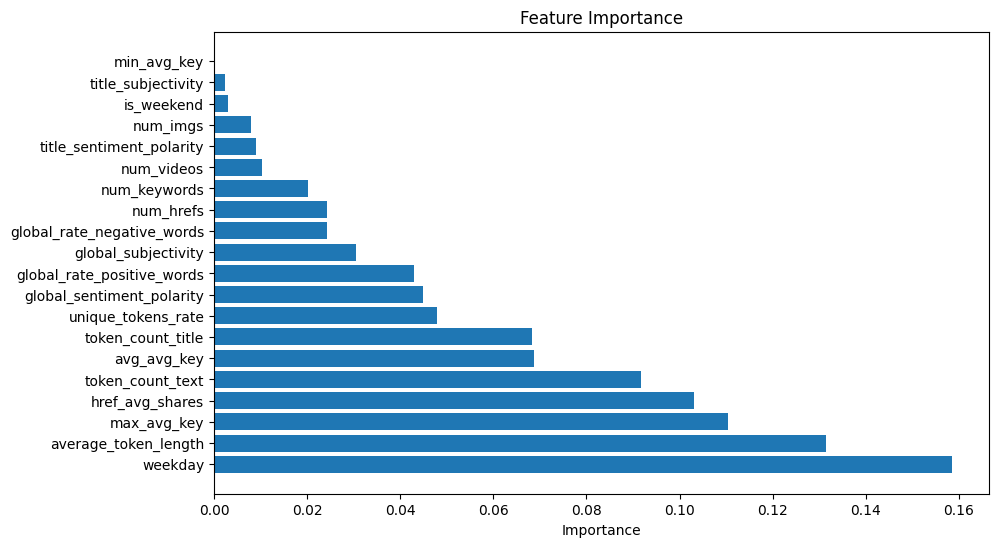

In [136]:
from sklearn.ensemble import RandomForestRegressor

# Select features and target variable
X = df.drop(['shares', 'article_id', 'title', 'text', 'published_date', 'data_channel', 'month'], axis=1)  # Excluding non-numeric and non-feature columns
y = df['shares']

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


### WordCloud

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

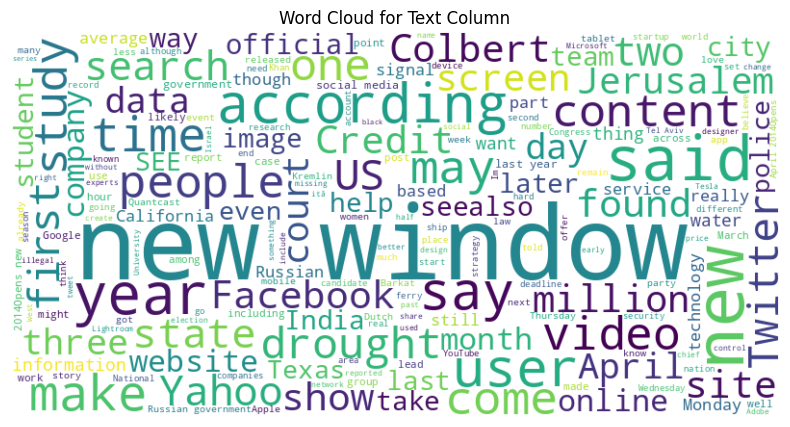

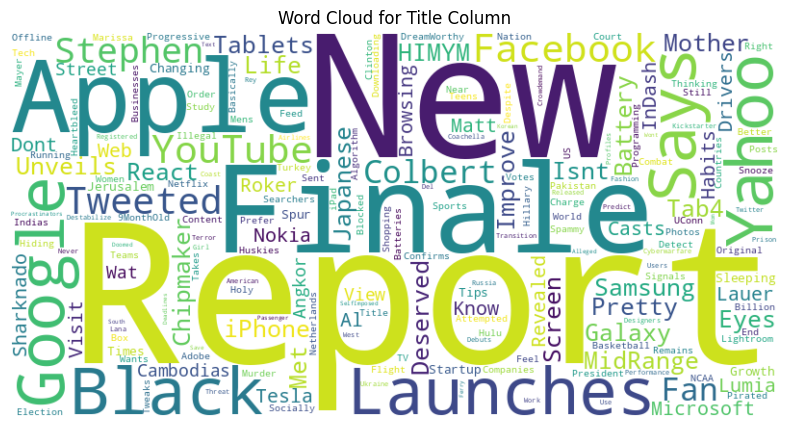

In [128]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for the 'text' column
generate_word_cloud(' '.join(df['text']), 'Word Cloud for Text')

# Generate word cloud for the 'title' column
generate_word_cloud(' '.join(df['title']), 'Word Cloud for Title')


### Model Implementation

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [142]:
top_features = feature_importance_df['Feature'].head(5).tolist()

# Select features and target variable
X = df[top_features]
y = df['shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Square Score:", r2)

0.8872154639401777
Mean Squared Error: 41045154.148225
R-Square Score: -0.5502941920973421
